In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
def create_model():
  model = models.Sequential([
      layers.Flatten(input_shape = (32,32,3)),
      layers.Dense(512,activation = 'relu'),
      layers.Dense(256,activation = 'relu'),
      layers.Dense(128,activation ='relu'),
      layers.Dense(10,activation = 'softmax')
  ])
  return model

In [7]:
model = create_model()
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train,y_train,
          epochs =10, batch_size = 64,
          validation_split = 0.2, verbose = 1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.2598 - loss: 2.0516 - val_accuracy: 0.3676 - val_loss: 1.7680
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3828 - loss: 1.7131 - val_accuracy: 0.4098 - val_loss: 1.6611
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4148 - loss: 1.6306 - val_accuracy: 0.4085 - val_loss: 1.6741
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4462 - loss: 1.5521 - val_accuracy: 0.4511 - val_loss: 1.5581
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.4620 - loss: 1.5137 - val_accuracy: 0.4470 - val_loss: 1.5587
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4677 - loss: 1.4780 - val_accuracy: 0.4522 - val_loss: 1.5675
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4815 - loss: 1.4390 - val_accuracy: 0.4658 - val_loss: 1.5255
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4855 - loss: 1.4201 - 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Model test accuracy: {round(test_accuracy*100,2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4811 - loss: 1.4723
Model test accuracy: 47.89%


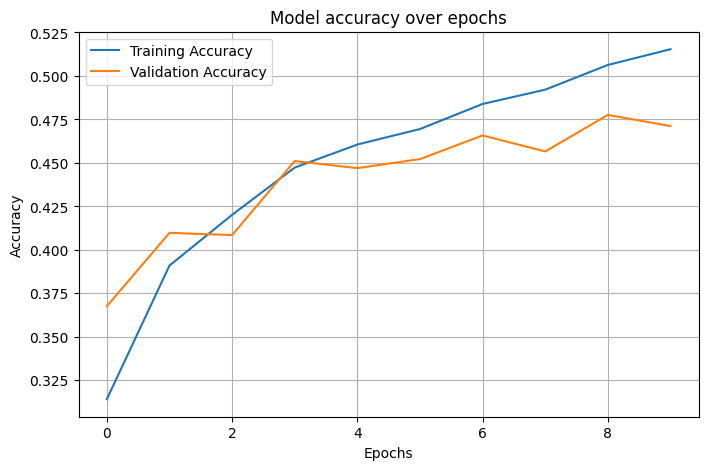

In [9]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Model accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
sample = x_test[10:13]
prediction = model.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


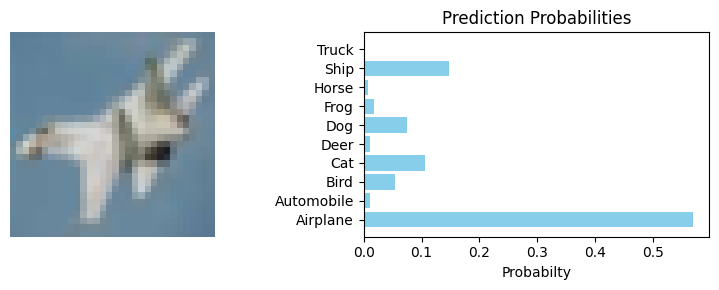

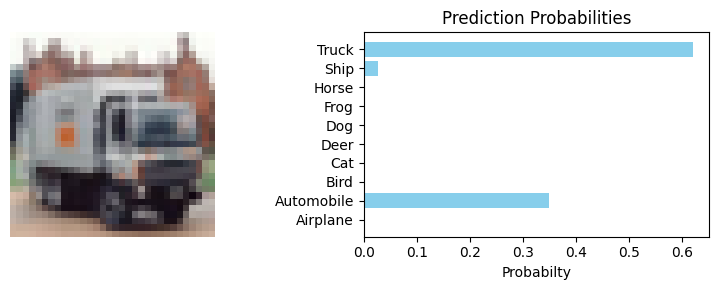

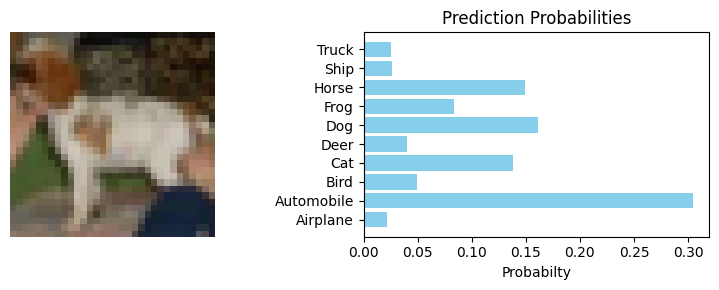

In [19]:
def plot_prediction_probability(prediction, image):
  plt.figure(figsize = (8,3))

  plt.subplot(1,2,1)
  plt.imshow(image)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.barh(labels,prediction,color = 'skyblue')
  plt.xlabel("Probabilty")
  plt.title("Prediction Probabilities")

  plt.tight_layout()
  plt.show()

for i in range(3):
  plot_prediction_probability(prediction[i],sample[i])